In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

### Basis ftn
D 차원 독립 변수 벡터 $\rightarrow$ ( 기저함수 이용 ) $\rightarrow$ M 차원 벡터

$$R^D \rightarrow R^M $$

In [14]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

$$(\ x_1^2,\ \sqrt2x_1x_2,\ x_2^2\ )$$

In [15]:
def basis(X):
    return np.vstack([X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2]).T
FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ]])

### Kernel

- Polynomial Kernel
    $$ k(x_1,x_2) = (\gamma(x_1^Tx_2)+ \theta)^d $$

- RBF or Gaussian Kernel
    $$ k(x_1,x_2) = exp(- \gamma \lVert x_1 - x_2 \rVert^2) $$

- Sigmoid Kernel
    $$ k(x_1,x_2) = tanh(\gamma (x_1^Tx_2) + \theta) $$

c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.c

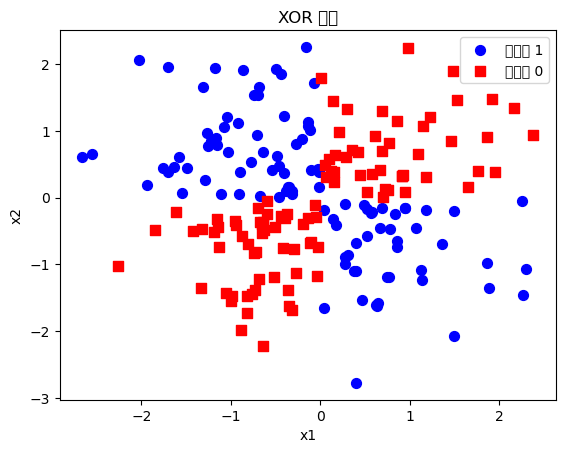

In [16]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='클래스 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='클래스 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR 문제")
plt.show()

c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda3\envs\test01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig

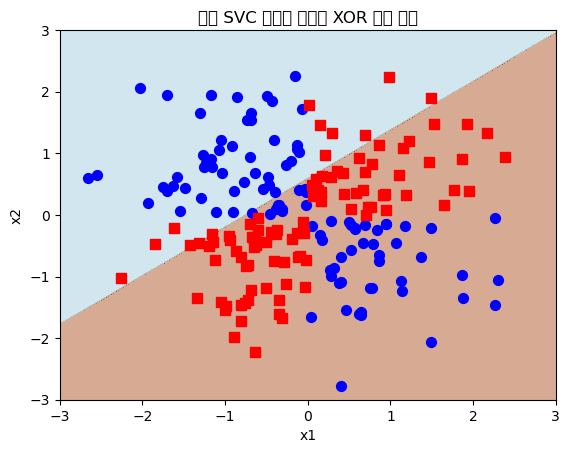

In [17]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "선형 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

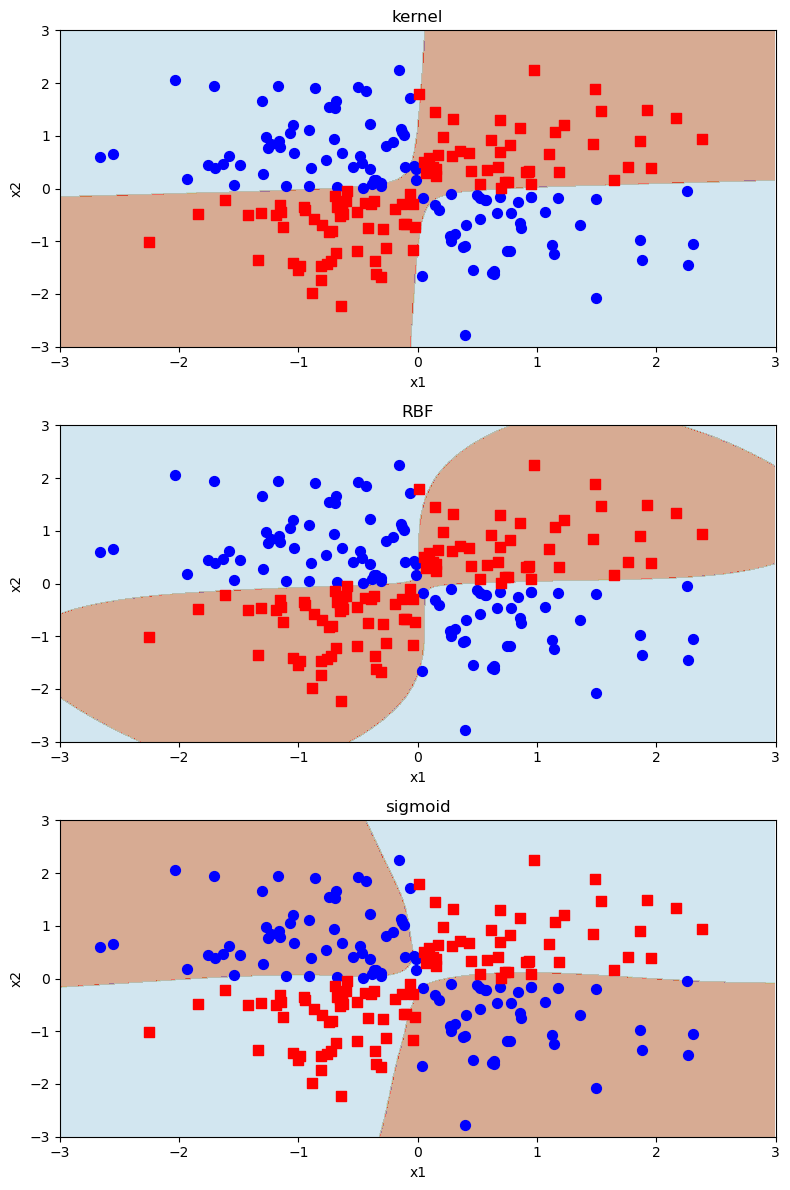

In [19]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_xor(X_xor, y_xor, polysvc, 'kernel')
plt.subplot(312)
plot_xor(X_xor, y_xor, rbfsvc, 'RBF')
plt.subplot(313)
plot_xor(X_xor, y_xor, sigmoidsvc, 'sigmoid')
plt.tight_layout()
plt.show()